### Dataset automóveis

In [96]:
import pandas as pd
import numpy as np

url = "https://drive.google.com/uc?id=18vLjeLLpKyFdFHAVODoEqhIrZxH9mK7O"

# carregar o dataset
df = pd.read_csv(url, names = ["Simbologia","Desavalorização","Fabricante","Combustível","Aspiração",
                               "Número de portas","Estilo","Tração","Localização do Motor","Base da roda",
                               "Comprimento","Largura","Altura","Peso","Tipo do motor","Quantidade de Cilindros",
                               "Tamanho do Motor","Sistema de Combustível","Calibre do Motor","Volume",
                               "Taxa de Compressão","Cavalos","Pico de RPM","Consumo na cidade","Consumo na rodovia",
                               "Valor"], header=None)


df = df.iloc[:, 2:]
df_ = df.loc[df["Valor"]=="?"]
df = df.drop(df_.index)
df["Valor"] = df["Valor"].astype(float)


df_ = df.loc[df["Número de portas"]=="two"]

df['Número de portas'] = df['Número de portas'].replace(['two'],2)
df['Número de portas'] = df['Número de portas'].replace(['four'],4)

df.head()

,Fabricante,Combustível,Aspiração,Número de portas,Estilo,Tração,Localização do Motor,Base da roda,Comprimento,Largura,...,Tamanho do Motor,Sistema de Combustível,Calibre do Motor,Volume,Taxa de Compressão,Cavalos,Pico de RPM,Consumo na cidade,Consumo na rodovia,Valor
0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [97]:
df.describe()

,Base da roda,Comprimento,Largura,Altura,Peso,Tamanho do Motor,Taxa de Compressão,Consumo na cidade,Consumo na rodovia,Valor
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


### Embaralhando os dados

In [98]:
import numpy as np

# embaralhando as amostras (random)
np.random.seed(0)

#retorna uma faixa de valores permutados
indices = np.random.permutation(len(df))

corte = round(len(df)*0.75)
#iloc seleciona a posição do dataframe com base no inteiro passado como parâmetro
amostras_treino = df[['Base da roda', 'Comprimento', 'Largura', 'Altura', 'Peso','Tamanho do Motor', 'Taxa de Compressão', 'Consumo na cidade', 'Consumo na rodovia']].iloc[indices[:corte]]
#cat.codes: retorna os codigos para as categorias 
rotulos_treino = df['Valor'].iloc[indices[:corte]]

amostras_teste = df[['Base da roda', 'Comprimento', 'Largura', 'Altura', 'Peso','Tamanho do Motor', 'Taxa de Compressão', 'Consumo na cidade', 'Consumo na rodovia']].drop(amostras_treino.index)
rotulos_teste = df['Valor'].drop(rotulos_treino.index)

In [99]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

amostras_treino = pd.DataFrame(scaler.fit_transform(amostras_treino),columns = amostras_treino.columns)
amostras_teste = pd.DataFrame(scaler.transform(amostras_teste),columns = amostras_teste.columns)

In [100]:
amostras_treino.head()

,Base da roda,Comprimento,Largura,Altura,Peso,Tamanho do Motor,Taxa de Compressão,Consumo na cidade,Consumo na rodovia
0,-0.714753,-1.581176,-1.115986,-0.747175,-1.362105,-0.911696,-0.175652,2.207745,1.949094
1,0.575350,0.083847,0.252894,0.429760,-0.181157,-0.434848,2.895467,0.868912,0.401706
2,2.502338,2.053138,1.149747,1.971951,1.670164,0.566534,2.538360,0.032141,-0.836204
3,0.248741,0.599413,0.252894,0.510928,1.017330,1.257964,-0.318495,-1.306692,-1.300421
4,0.918288,1.114978,0.252894,0.105088,1.126460,0.781116,-0.270881,-0.971984,-0.990943


### Linear regression

In [101]:
import numpy as np
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(amostras_treino.select_dtypes([np.number]), rotulos_treino) #Treinando o modelo apenas com os valores numericos

LinearRegression()

In [102]:
resultado_lin = lin_reg.predict(amostras_teste.select_dtypes([np.number]))

rmse_lin = np.mean((resultado_lin-rotulos_teste)**2)**(1/2) #RMSE na mão

rmse_lin

3756.823866955112

In [103]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(amostras_teste)
lin_mse = mean_squared_error(rotulos_teste, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse



3756.823866955112

### KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(amostras_treino.select_dtypes([np.number]), rotulos_treino)
resultado_knn = knn.predict(amostras_teste.select_dtypes([np.number]))

rmse_knn = np.mean((resultado_knn-rotulos_teste)**2)**(1/2) #RMSE na mão
rmse_knn

/home/gardin/.local/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


3363.372016295551

### RandomForest

In [105]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(amostras_treino.select_dtypes([np.number]), rotulos_treino)
resultado_rf = rf.predict(amostras_teste.select_dtypes([np.number]))

rmse_rf = np.mean((resultado_rf-rotulos_teste)**2)**(1/2) #RMSE na mão
rmse_rf

1623.4672850990355

### SVM

In [106]:
from sklearn import svm

svm_model = svm.SVR(kernel="linear")
svm_model.fit(amostras_treino.select_dtypes([np.number]), rotulos_treino)
resultado_svm_lin = svm_model.predict(amostras_teste.select_dtypes([np.number]))

rmse_svm_lin = np.mean((resultado_svm_lin-rotulos_teste)**2)**(1/2) #RMSE na mão
print("RMSE LINEAR: ", rmse_svm_lin)


svm_model = svm.SVR(kernel="poly")
svm_model.fit(amostras_treino.select_dtypes([np.number]), rotulos_treino)
resultado_svm_poly = svm_model.predict(amostras_teste.select_dtypes([np.number]))

rmse_svm_poly = np.mean((resultado_svm_poly-rotulos_teste)**2)**(1/2) #RMSE na mão
print("RMSE POLYNOMIAL: ", rmse_svm_poly)

svm_model = svm.SVR(kernel="rbf")
svm_model.fit(amostras_treino.select_dtypes([np.number]), rotulos_treino)
resultado_svm_rbf = svm_model.predict(amostras_teste.select_dtypes([np.number]))

rmse_svm_rbf = np.mean((resultado_svm_rbf-rotulos_teste)**2)**(1/2) #RMSE na mão
print("RMSE RBF: ", rmse_svm_rbf)

RMSE LINEAR:  6048.93592531351
RMSE POLYNOMIAL:  6390.586853347847
RMSE RBF:  6638.069760061483


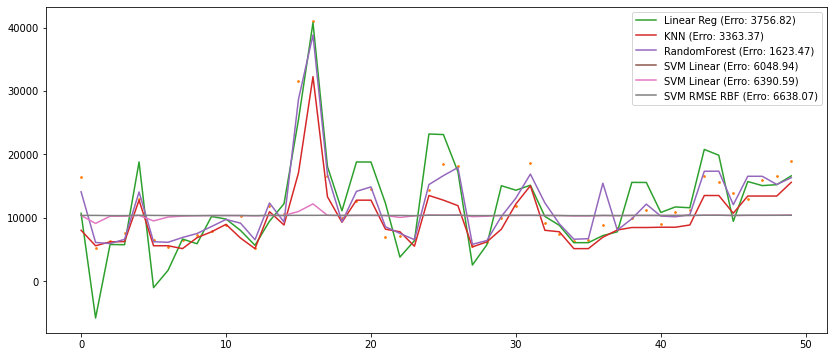

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

plt.plot(resultado_lin, label="Linear Reg (Erro: " + str(round(rmse_lin, 2)) + ")", color="C2")

plt.plot(resultado_knn, label="KNN (Erro: " + str(round(rmse_knn, 2)) + ")", color="C3")

plt.plot(resultado_rf, label="RandomForest (Erro: " + str(round(rmse_rf, 2)) + ")", color="C4")

plt.plot(rmse_svm_lin, label="SVM Linear (Erro: " + str(round(rmse_svm_lin, 2)) + ")", color="C5")

plt.plot(resultado_svm_poly, label="SVM Linear (Erro: " + str(round(rmse_svm_poly, 2)) + ")", color="C6")

plt.plot(resultado_svm_rbf, label="SVM RMSE RBF (Erro: " + str(round(rmse_svm_rbf, 2)) + ")", color="C7")

plt.scatter(range(0, amostras_teste.index.size), rotulos_teste, s=3, color="C1")

plt.legend()


### Rede neural

In [108]:
input_ = keras.layers.Input(shape=amostras_treino.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input_], outputs=[output])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

history = model.fit(amostras_treino, rotulos_treino, epochs=30, validation_data=(amostras_teste, rotulos_teste))

#mse_test = model.evaluate(amostras_teste, rotulos_teste)

#resultado_neural = model.predict(amostras_teste)

Epoch 1/30
5/5 [==============================] - 0s 21ms/step - loss: 56470986752.0000 - val_loss: 182727296.0000
Epoch 2/30
5/5 [==============================] - 0s 5ms/step - loss: 238926752.0000 - val_loss: 179117104.0000
Epoch 3/30
5/5 [==============================] - 0s 5ms/step - loss: 233656784.0000 - val_loss: 175604208.0000
Epoch 4/30
5/5 [==============================] - 0s 5ms/step - loss: 228609184.0000 - val_loss: 172216192.0000
Epoch 5/30
5/5 [==============================] - 0s 5ms/step - loss: 223635584.0000 - val_loss: 168932272.0000
Epoch 6/30
5/5 [==============================] - 0s 5ms/step - loss: 218998256.0000 - val_loss: 165734592.0000
Epoch 7/30
5/5 [==============================] - 0s 5ms/step - loss: 214298848.0000 - val_loss: 162676544.0000
Epoch 8/30
5/5 [==============================] - 0s 5ms/step - loss: 209693520.0000 - val_loss: 159650000.0000
Epoch 9/30
5/5 [==============================] - 0s 5ms/step - loss: 205421504.0000 - val_loss: 1567

In [235]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("best_neural.h5",
                            monitor="val_loss",
                            mode = "min",
                            save_best_only=True,
                            verbose=1)


earlystop = EarlyStopping(monitor="loss",
                          min_delta = 0,
                          patience=3,
                          verbose=1,
                          restore_best_weights = True)

callbacks = [earlystop, checkpoint]

In [238]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=amostras_treino.shape[1:]),
    keras.layers.Dense(9, activation="relu"),
    keras.layers.Dense(9, activation="relu"),
    keras.layers.Dense(9, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=6.5e-8))

history = model.fit(amostras_treino, rotulos_treino, epochs=300, 
                    validation_data=(amostras_teste, rotulos_teste), callbacks = callbacks)
#X_new = X_test[:3]


resultado_neural = model.predict(amostras_teste)

Epoch 1/300
1/5 [=====>........................] - ETA: 0s - loss: 245066624.0000
Epoch 00001: val_loss did not improve from 8184244.50000
5/5 [==============================] - 0s 22ms/step - loss: 256007328.0000 - val_loss: 180692464.0000
Epoch 2/300
1/5 [=====>........................] - ETA: 0s - loss: 225802688.0000
Epoch 00002: val_loss did not improve from 8184244.50000
5/5 [==============================] - 0s 5ms/step - loss: 256006672.0000 - val_loss: 180691888.0000
Epoch 3/300
1/5 [=====>........................] - ETA: 0s - loss: 198437248.0000
Epoch 00003: val_loss did not improve from 8184244.50000
5/5 [==============================] - 0s 5ms/step - loss: 256006048.0000 - val_loss: 180691328.0000
Epoch 4/300
1/5 [=====>........................] - ETA: 0s - loss: 166796704.0000
Epoch 00004: val_loss did not improve from 8184244.50000
5/5 [==============================] - 0s 5ms/step - loss: 256005424.0000 - val_loss: 180690784.0000
Epoch 5/300
1/5 [=====>................

1/5 [=====>........................] - ETA: 0s - loss: 346700416.0000
Epoch 00035: val_loss did not improve from 8184244.50000
5/5 [==============================] - 0s 4ms/step - loss: 255986224.0000 - val_loss: 180673840.0000
Epoch 36/300
1/5 [=====>........................] - ETA: 0s - loss: 255409456.0000
Epoch 00036: val_loss did not improve from 8184244.50000
5/5 [==============================] - 0s 5ms/step - loss: 255985360.0000 - val_loss: 180673088.0000
Epoch 37/300
1/5 [=====>........................] - ETA: 0s - loss: 307698592.0000
Epoch 00037: val_loss did not improve from 8184244.50000
5/5 [==============================] - 0s 5ms/step - loss: 255984512.0000 - val_loss: 180672272.0000
Epoch 38/300
1/5 [=====>........................] - ETA: 0s - loss: 216948864.0000
Epoch 00038: val_loss did not improve from 8184244.50000
5/5 [==============================] - 0s 5ms/step - loss: 255983616.0000 - val_loss: 180671488.0000
Epoch 39/300
1/5 [=====>........................]

Epoch 103/300
1/5 [=====>........................] - ETA: 0s - loss: 44101924.0000
Epoch 00103: val_loss did not improve from 8184244.50000
5/5 [==============================] - 0s 5ms/step - loss: 49619328.0000 - val_loss: 18938460.0000
Epoch 104/300
1/5 [=====>........................] - ETA: 0s - loss: 38433772.0000
Epoch 00104: val_loss did not improve from 8184244.50000
5/5 [==============================] - 0s 5ms/step - loss: 29395066.0000 - val_loss: 18480450.0000
Epoch 105/300
1/5 [=====>........................] - ETA: 0s - loss: 19999044.0000
Epoch 00105: val_loss did not improve from 8184244.50000
5/5 [==============================] - 0s 5ms/step - loss: 18704922.0000 - val_loss: 15831195.0000
Epoch 106/300
1/5 [=====>........................] - ETA: 0s - loss: 21198864.0000
Epoch 00106: val_loss did not improve from 8184244.50000
5/5 [==============================] - 0s 5ms/step - loss: 14736940.0000 - val_loss: 20552340.0000
Epoch 107/300
1/5 [=====>...................

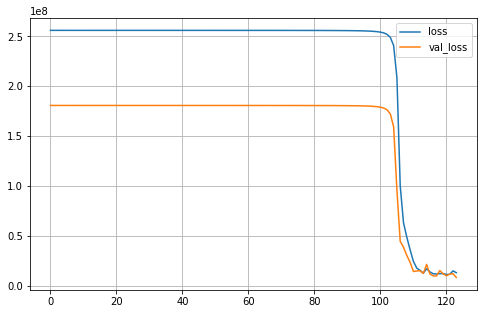

In [237]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()



In [229]:
from keras.models import load_model

classifier = load_model('best_neural.h5')

mse_test = classifier.evaluate(amostras_teste, rotulos_teste)
#mse_test = classifier.evaluate(amostras_treino, rotulos_treino)


rmse_neural = (mse_test **(1/2))
rmse_neural

2/2 [==============================] - 0s 1ms/step - loss: 8642644.0000


2939.8374104701775

In [230]:
resultado_neural = model.predict(amostras_teste)

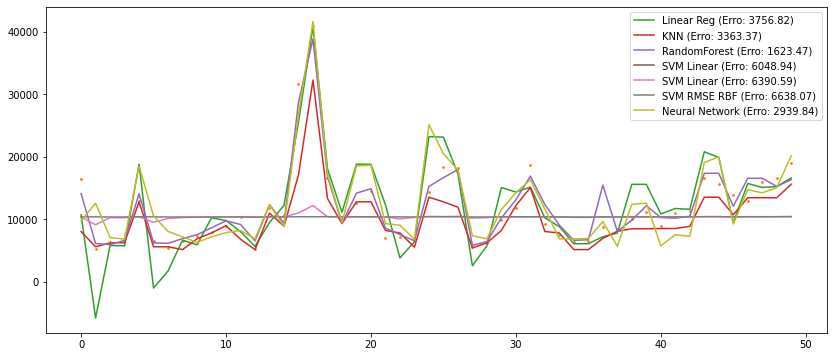

In [231]:
plt.figure(figsize=(14,6))

plt.plot(resultado_lin, label="Linear Reg (Erro: " + str(round(rmse_lin, 2)) + ")", color="C2")

plt.plot(resultado_knn, label="KNN (Erro: " + str(round(rmse_knn, 2)) + ")", color="C3")

plt.plot(resultado_rf, label="RandomForest (Erro: " + str(round(rmse_rf, 2)) + ")", color="C4")

plt.plot(rmse_svm_lin, label="SVM Linear (Erro: " + str(round(rmse_svm_lin, 2)) + ")", color="C5")

plt.plot(resultado_svm_poly, label="SVM Linear (Erro: " + str(round(rmse_svm_poly, 2)) + ")", color="C6")

plt.plot(resultado_svm_rbf, label="SVM RMSE RBF (Erro: " + str(round(rmse_svm_rbf, 2)) + ")", color="C7")

plt.plot(resultado_neural, label="Neural Network (Erro: " + str(round(rmse_neural, 2)) + ")", color="C8")

plt.scatter(range(0, amostras_teste.index.size), rotulos_teste, s=3, color="C1")

plt.legend()
